In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/sylva/OneDrive/Bureau/barometre/donnees_brutes_2021.csv", sep=";")

C:\Users\sylva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,3,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
var_indicateur=['Indicateur_ressenti_global', 'Indicateur_securite',
       'Indicateur_confort', 'Indicateur_effort_ville',
       'Indicateur_amenagements_services', 'Indicateur_global']

In [4]:
p=re.compile('(\D*) \(([0-9]{2,2})[0-9]{3,3}\)')
def yo_ville(x):
    m=p.match(x)
    return m.group(1)+' ' +m.group(2)
df['Ville']=df['Commune'].apply(yo_ville)

In [5]:
def yo_float(x):
    return float(str(x).replace(',','.'))

def indicateurs_nombres(df1, liste_indicateur=var_indicateur):
    for indicateur in var_indicateur :
        if indicateur in df1.columns:
            df1[indicateur]=df1[indicateur].apply(yo_float)
    return df1
df=indicateurs_nombres(df)


In [7]:
np.mean(df[['Conducteurs_respectent']])

Conducteurs_respectent    3.337445
dtype: float64

array([[<AxesSubplot:title={'center':'Conducteurs_respectent'}>]],
      dtype=object)

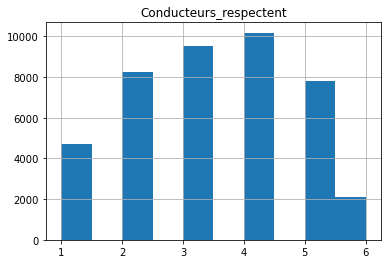

In [11]:
df[['Conducteurs_respectent']].hist()

Non


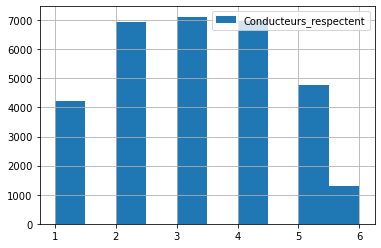

Oui


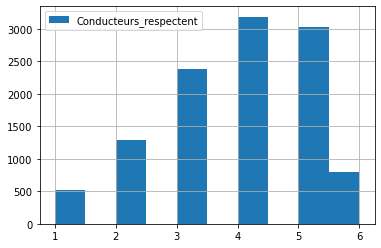

In [19]:
for personne in df['Membre_association_marche'].dropna().unique() :
    print(personne)
    df[df['Membre_association_marche']==personne]['Conducteurs_respectent'].hist(legend=True)
    plt.show()

Femme


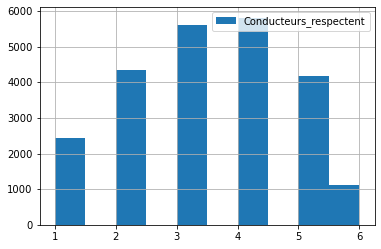

Homme


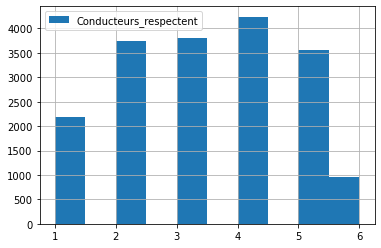

Ne souhaite pas répondre


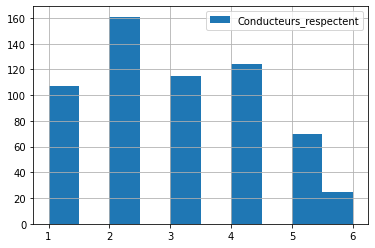

In [21]:
for sexe in df['Sexe_repondant'].dropna().unique() :
    print(sexe)
    df[df['Sexe_repondant']==sexe]['Conducteurs_respectent'].hist(legend=True)
    plt.show()

De 5000 et 19 999 habitants


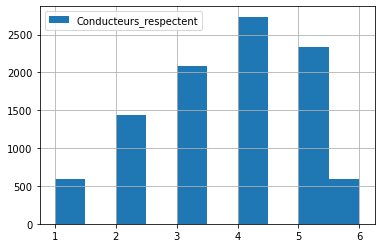

De 100 000 et 199 999 habitants


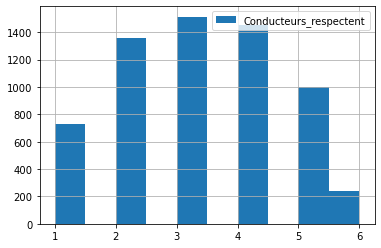

De 20 000 et 49 999 habitants


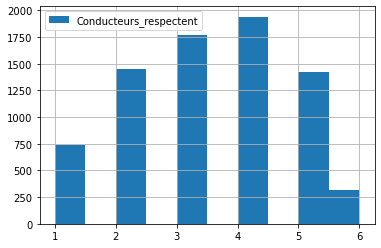

De 50 000 et 99 999 habitants


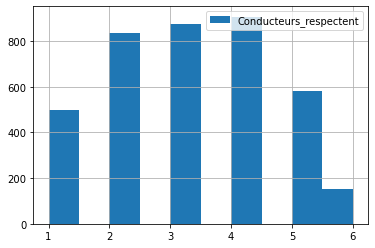

200 000 habitants ou plus


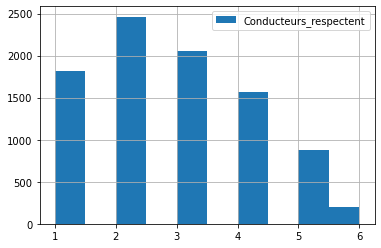

Moins de 5000 habitants


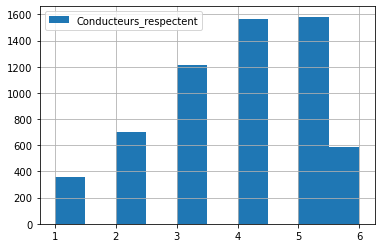

In [24]:
for com in df['Taille_commune_2'].dropna().unique() :
    print(com)
    df[df['Taille_commune_2']==com]['Conducteurs_respectent'].hist(legend=True)
    plt.show()

Plus grand respect estimé dans les petites villes. 